In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("credit_train.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [4]:
df.drop(['Loan ID', 'Customer ID','Months since last delinquent'],axis=1,inplace=True)

In [5]:
df.shape

(100000, 16)

In [6]:
df.isna().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [7]:
df.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [8]:
df.dtypes

Loan Status                   object
Current Loan Amount            int64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

In [9]:
cat=df.select_dtypes(include="object")
num=df.select_dtypes(include="number")

In [10]:
num.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412,709.0,1167493.0,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,262328,NaN,NaN,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,99999999,741.0,2231892.0,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,347666,721.0,806949.0,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,176220,NaN,NaN,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [11]:
df['Credit Score'].fillna(0,inplace=True)

In [12]:
df['Current Loan Amount'].fillna(value=df['Current Loan Amount'].median(),inplace=True)

In [13]:
df['Annual Income'].fillna(value=df['Annual Income'].median(),inplace=True)

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
cat=pd.get_dummies(cat,dtype='int')
print(cat.head(10))
x=pd.concat([cat,num],axis=1)

   Loan Status_Charged Off  Loan Status_Fully Paid  Term_Long Term  \
0                        0                       1               0   
1                        0                       1               0   
2                        0                       1               0   
3                        0                       1               1   
4                        0                       1               0   
5                        1                       0               0   
6                        0                       1               0   
7                        1                       0               1   
8                        0                       1               0   
9                        0                       1               0   

   Term_Short Term  Years in current job_1 year  \
0                1                            0   
1                1                            0   
2                1                            0   
3                0       

In [16]:
df['Loan Status'].value_counts()

Fully Paid     74257
Charged Off    21315
Name: Loan Status, dtype: int64

In [17]:
df['Loan Status']

0         Fully Paid
1         Fully Paid
2         Fully Paid
3         Fully Paid
4         Fully Paid
5        Charged Off
6         Fully Paid
7        Charged Off
8         Fully Paid
9         Fully Paid
10        Fully Paid
11        Fully Paid
12        Fully Paid
13        Fully Paid
14        Fully Paid
15        Fully Paid
16       Charged Off
17        Fully Paid
18        Fully Paid
19        Fully Paid
20       Charged Off
21        Fully Paid
22       Charged Off
23        Fully Paid
24        Fully Paid
25        Fully Paid
26        Fully Paid
27        Fully Paid
28        Fully Paid
30        Fully Paid
            ...     
99969     Fully Paid
99970     Fully Paid
99971     Fully Paid
99972     Fully Paid
99973     Fully Paid
99974     Fully Paid
99975    Charged Off
99976     Fully Paid
99977     Fully Paid
99978     Fully Paid
99979     Fully Paid
99980     Fully Paid
99981    Charged Off
99982     Fully Paid
99983     Fully Paid
99984     Fully Paid
99985     Ful

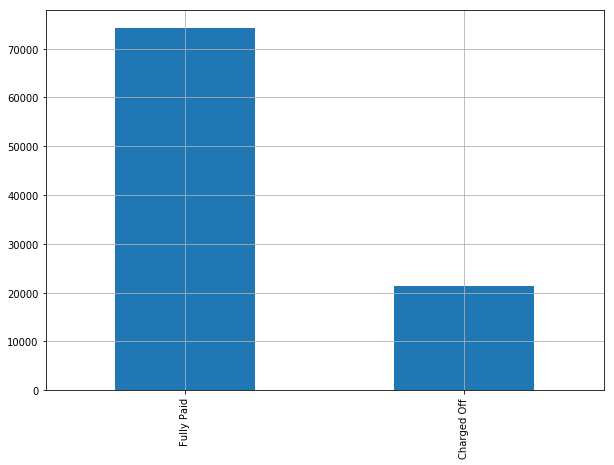

In [18]:
df['Loan Status'].value_counts().plot(kind='bar',grid=True,figsize=(10,7))

In [19]:
df['Term']=df.Term.convert_objects(convert_numeric=True)

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [20]:
import seaborn as sns
def heatMap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

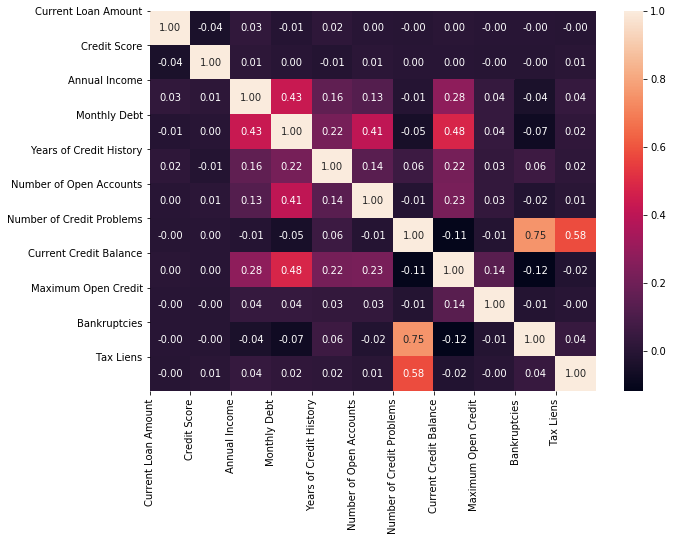

In [21]:
heatMap(df)

In [22]:
print(df['Credit Score'].min())
print(df['Credit Score'].max())
print(df['Credit Score'].median())

0.0
7510.0
717.0


In [23]:
df['Credit Score_range']=pd.cut(df['Credit Score'],[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7510],right=True)

In [24]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Credit Score_range'],
      dtype='object')

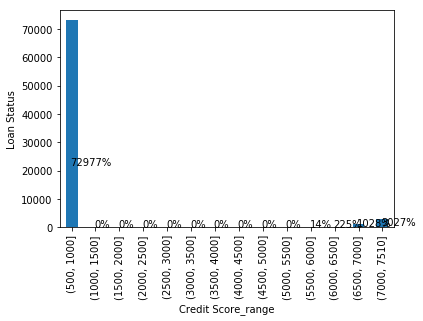

In [25]:
LS_CSR=df.groupby(['Credit Score_range'])['Loan Status'].size().plot(kind='bar',stacked=True)
LS_CSR.set_ylabel('Loan Status')
LS_CSR.set_xlabel('Credit Score_range')

for i in LS_CSR.patches:
    width, height = i.get_width(), i.get_height()
    x, y =i.get_xy() 
    LS_CSR.annotate('{:.0f}%'.format(height), (i.get_x()+.40*width, i.get_y()+.3*height),
                color = 'black')

In [26]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Credit Score_range'],
      dtype='object')

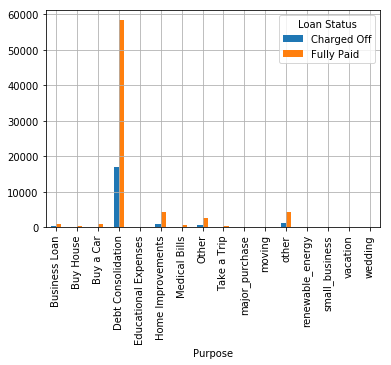

In [27]:
df.groupby(['Purpose','Loan Status']).size().unstack().plot(kind='bar',grid=True)

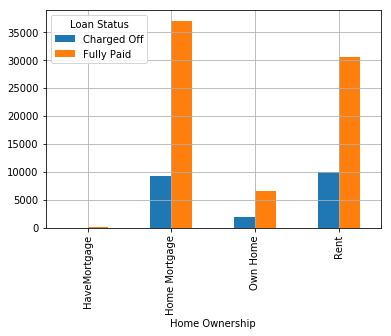

In [28]:
df.groupby(['Home Ownership','Loan Status']).size().unstack().plot(kind='bar',grid=True)

In [29]:
print(df['Annual Income'].min())
print(df['Annual Income'].max())
print(df['Annual Income'].median())

76627.0
165557393.0
1174162.0


In [30]:
df['Annual Income Range']=pd.cut(df['Annual Income'],[50000,250000,500000,1000000,2000000,5000000,200000000],
                                 labels=['Poor','Working Class','Lower Middle Class','Middle Class','Upper Middle Class','High Class'],
                                 right=True)

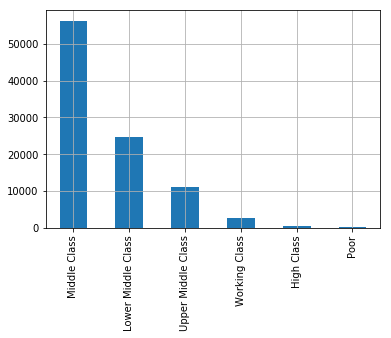

In [31]:
df['Annual Income Range'].value_counts().plot(kind='bar',grid=True)

In [32]:
print(df['Annual Income'].min())
print(df['Annual Income'].max())

76627.0
165557393.0


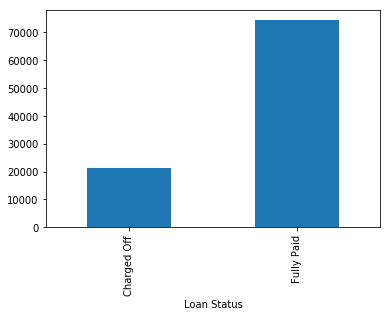

In [33]:
df.groupby(['Loan Status']).size().plot(kind='bar')

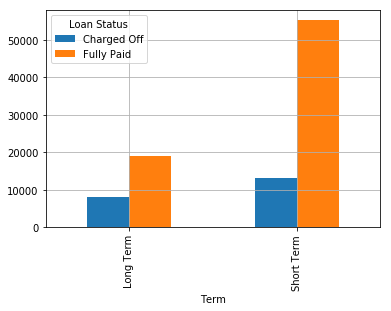

In [34]:
df.groupby(['Term','Loan Status']).size().unstack().plot(kind='bar',grid=True)

In [35]:
df.pivot_table(index='Loan Status',aggfunc='mean',dropna=True)

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Maximum Open Credit,Monthly Debt,Number of Credit Problems,Number of Open Accounts,Tax Liens,Years of Credit History
Loan Status,,,,,,,,,,,
Charged Off,1.264890e+06,0.107811,1828.897209,291206.686277,3.301956e+05,631571.442083,18972.324350,0.163734,11.327703,0.033967,17.607821
Fully Paid,1.382277e+06,0.114548,590.287461,298631.019419,1.511723e+07,797646.462933,18644.665921,0.162261,11.144310,0.026880,18.105194


In [36]:
print(df['Credit Score'].min())
print(df['Credit Score'].max())
print(df['Credit Score'].median())

0.0
7510.0
717.0


In [37]:
def mapping(df):
    if df>=717:
        return 'Low Risky'
    else:
        return 'High Risky'

In [38]:
df['Loan Risky']=df['Credit Score'].apply(mapping)

In [39]:
df['Number of Open Accounts'].unique()

array([ 6, 35, 18,  9, 15, 13,  4, 20, 16, 23, 10,  8,  7, 12, 17, 14, 11,
       34, 22,  5, 19,  2, 32, 21,  3, 25, 24, 43,  1, 30, 27, 26, 28, 36,
       31, 29, 45, 37, 33, 38, 40, 41, 47, 48, 39,  0, 56, 42, 44, 52, 76],
      dtype=int64)

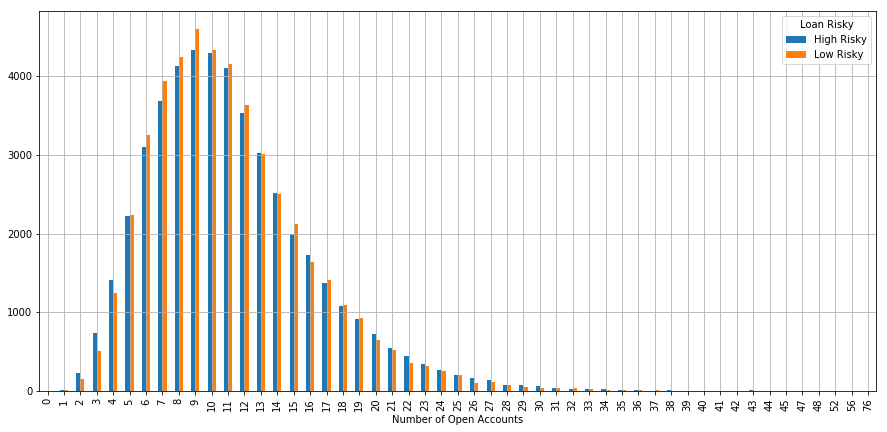

In [40]:
df.groupby(['Number of Open Accounts','Loan Risky']).size().unstack().plot(kind='bar',grid=True,figsize=(15,7))

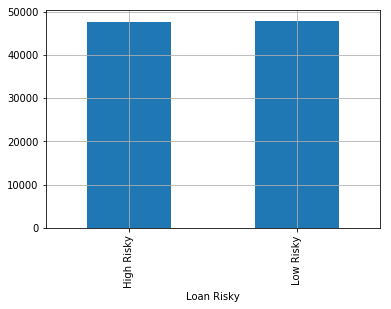

In [41]:
df.groupby(['Loan Risky']).size().plot(kind='bar',grid=True)

In [42]:
test_data=df[df['Credit Score']==0]
train_data=df[df['Credit Score']!=0]

In [43]:
print(test_data.shape,train_data.shape)

(18301, 19) (77271, 19)


In [44]:
train_data.drop('Loan Status',axis=1,inplace=True)

C:\Users\Karthik\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
train_data.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Credit Score_range', 'Annual Income Range', 'Loan Risky'],
      dtype='object')

In [46]:
loan_train_y=train_data['Credit Score']
loan_train_x=train_data[['Current Loan Amount',
        'Annual Income', 'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts','Bankruptcies',
       'Current Credit Balance',
       'Tax Liens']]

In [47]:
loan_cat=loan_train_x.select_dtypes(include='object')
loan_num=loan_train_x.select_dtypes(include='number')

In [48]:
loan_cat=pd.get_dummies(loan_cat)
loan_train_x=pd.concat([loan_cat,loan_num],axis=1)

In [49]:
loan_train_x.head(10)

,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Bankruptcies,Current Credit Balance,Tax Liens
0,0,0,0,0,0,0,0,0,1,0,0,445412,1167493.0,5214.74,17.2,6,1.0,228190,0.0
2,0,0,0,0,0,0,0,0,1,0,0,99999999,2231892.0,29200.53,14.9,18,0.0,297996,0.0
3,0,0,0,1,0,0,0,0,0,0,0,347666,806949.0,8741.90,12.0,9,0.0,256329,0.0
5,0,1,0,0,0,0,0,0,0,0,0,206602,896857.0,16367.74,17.3,6,0.0,215308,0.0
6,0,0,0,0,0,0,0,0,0,0,1,217646,1184194.0,10855.08,19.6,13,1.0,122170,0.0
8,0,0,1,0,0,0,0,0,0,0,0,548746,2559110.0,18660.28,22.6,4,0.0,437171,0.0
9,0,0,0,0,0,0,0,0,0,0,1,215952,1454735.0,39277.75,13.9,20,0.0,669560,0.0
10,0,0,0,1,0,0,0,0,0,0,0,99999999,714628.0,11851.06,16.0,16,0.0,203965,0.0
12,0,0,0,0,0,0,0,0,0,0,1,99999999,776188.0,11578.22,8.5,6,0.0,134083,0.0
13,0,0,0,0,1,0,0,0,0,0,0,99999999,1560907.0,17560.37,13.3,10,1.0,225549,0.0


In [50]:
test_data.drop('Loan Status',axis=1,inplace=True)

In [51]:
test_data.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Credit Score_range', 'Annual Income Range', 'Loan Risky'],
      dtype='object')

In [52]:
loan_test_y=test_data['Credit Score']
loan_test_x=test_data[['Current Loan Amount',
        'Annual Income', 'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts','Bankruptcies',
       'Current Credit Balance', 'Maximum Open Credit',
       'Tax Liens']]

In [53]:
loan_test_cat=loan_test_x.select_dtypes(include='object')
loan_test_num=loan_test_x.select_dtypes(include='number')

In [54]:
loan_test_cat=pd.get_dummies(loan_test_cat)
loan_test_x=pd.concat([loan_test_cat,loan_test_num],axis=1)

In [55]:
lin_model=Ridge().fit(loan_train_x,loan_train_y)
predicted_Credit_scores=lin_model.predict(loan_test_x)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.06394e-20): result may not be accurate.
  overwrite_a=True).T


ValueError: shapes (18301,20) and (19,) not aligned: 20 (dim 1) != 19 (dim 0)

In [ ]:
predicted_Credit_scores[:20]

In [ ]:
predicted_Credit_scores

In [ ]:
print("Mean Squared Error:",mean_squared_error(loan_test_y,predicted_Credit_scores))

In [ ]:
print("R2 value:",r2_score(loan_test_y,predicted_Credit_scores))

In [ ]:
lin_model.intercept_

In [ ]:
lin_model.coef_[1]

In [ ]:
lin_model.coef_

In [ ]:
loan_test_x['Credit Score']=predicted_Credit_scores

In [ ]:
loan_train_x['Credit Score']=loan_train_y

In [ ]:
total_data=pd.concat([loan_train_x,loan_test_x],axis=0)

In [ ]:
total_data.head(5)

In [ ]:
df['Loan Status'].value_counts()

In [ ]:
total_data['Loan Status']=df['Loan Status'].replace(to_replace=["Fully Paid","Charged Off"],value=["1","0"])

In [ ]:
total_data.reset_index(drop=True,inplace=True)

In [ ]:
total_data.head(5)

In [ ]:
gx=df['Annual Income']
gy=df['Credit Score']
def standardize(gx):
    return (gx-np.mean(gx))/np.std(gx)

In [ ]:
DX=standardize(gx)
DX=np.c_[np.ones(gx.shape[0]),DX]
print(DX)

In [ ]:
alpha=0.01
m=gy.size
np.random.seed(23)
theta=np.random.rand(2)
iterations=2000

In [ ]:
def gradient_descent(gx,gy,theta,alpha,iterations):
    past_costs=[]
    past_thetas=[theta]
    print(past_thetas)
    for i in range(iterations):
        prediction=np.dot(gx,theta) 
        error=prediction-gy 
        cost=1/(m)*np.dot(error.T,error) 
        past_costs.append(cost)
        theta=theta-(alpha*(1/m)*np.dot(gx.T,error)) 
        past_thetas.append(theta)
    return past_costs,past_thetas
past_costs,past_thetas=gradient_descent(DX,gy,theta,alpha,iterations)

In [ ]:
print(past_thetas[-1])

In [ ]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
gx=df['Current Loan Amount']
gy=df['Credit Score']
def standardize(gx):
    return (gx-np.mean(gx))/np.std(gx)

DX=standardize(gx)
DX=np.c_[np.ones(gx.shape[0]),DX]
print(DX)

alpha=0.01
m=gy.size
np.random.seed(23)
theta=np.random.rand(2)
iterations=2000

def gradient_descent(gx,gy,theta,alpha,iterations):
    past_costs=[]
    past_thetas=[theta]
    print(past_thetas)
    for i in range(iterations):
        prediction=np.dot(gx,theta) 
        error=prediction-gy 
        cost=1/(m)*np.dot(error.T,error) 
        past_costs.append(cost)
        theta=theta-(alpha*(1/m)*np.dot(gx.T,error)) 
        past_thetas.append(theta)
    return past_costs,past_thetas
past_costs,past_thetas=gradient_descent(DX,gy,theta,alpha,iterations)

print(past_thetas[-1])

plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scikitplot.metrics import plot_roc_curve

In [ ]:
target= total_data['Loan Status']
ind_vars= total_data.loc[:,total_data.columns!='Loan Status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(ind_vars,target,test_size=0.2,random_state=35)

In [ ]:
lg_model=LogisticRegression().fit(x_train,y_train)
lg_predicted_values=lg_model.predict(x_test)

In [ ]:
print(sm.accuracy_score(y_test,lg_predicted_values)*100)

In [ ]:
print(sm.confusion_matrix(y_test,lg_predicted_values))

In [ ]:
print(sm.classification_report(y_test,lg_predicted_values))

In [ ]:
top_features=pd.Series(lg_model.coef_[0],index=loan_train_x.columns)
top_features.sort_values(ascending=False)[:10].plot(kind="bar")

In [ ]:
decisionTree_model=DecisionTreeClassifier(criterion='gini').fit(x_train,y_train)
train_predictions=decisionTree_model.predict(x_train)
test_predictions=decisionTree_model.predict(x_test)

In [ ]:
print("Decision Tree Train Accuracy:",sm.accuracy_score(y_train,train_predictions))
print("Decision Tree Test Accuracy:",sm.accuracy_score(y_test,test_predictions))

In [ ]:
print(sm.classification_report(y_test,test_predictions))

In [ ]:
y_pred_probs = decisionTree_model.predict_proba(x_test)
plot_roc_curve(y_test, y_pred_probs, curves=['each_class'], figsize=(10,7))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

In [ ]:
RF_clf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True)
RF_clf.fit(x_train,y_train)

In [ ]:
rf_train_predictions=RF_clf.predict(x_train)
print("Random Forest Train Accuracy:",sm.accuracy_score(y_train,rf_train_predictions)*100)

rf_predictions=RF_clf.predict(x_test)
print("Random Forest Test Accuracy:",sm.accuracy_score(y_test,rf_predictions)*100)

In [ ]:
imp_features=RF_clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

top_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[:10]
plt.bar(*zip(*top_10_features))
plt.xticks(rotation=90)
plt.show()

In [ ]:
imp_features=RF_clf.feature_importances_
cols=x_train.columns
important_features=[]
for feat_names in zip(cols,imp_features):
    important_features.append(feat_names)

least_10_features=sorted(important_features, key=lambda x: x[1],reverse=True)[-10:]
plt.bar(*zip(*least_10_features))
plt.xticks(rotation=90)
plt.show()

In [ ]:
params = {'max_depth': range(1,10,2),
          'max_features': ['auto', 'sqrt','log2'],
          'n_estimators': [5, 10, 12, 14, 15, 20],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'cv': [3,6,10]
         }

Grid_randomF = GridSearchCV(RandomForestClassifier(random_state=15), params)

Grid_randomF.fit(x_train, y_train)

print(Grid_randomF.best_params_)

In [ ]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced",oob_score=True,**Grid_randomF.best_params_)
clf.fit(x_train,y_train)

In [ ]:
clf_score = cross_val_score(clf, x_train, y_train, cv=10)
print(clf_score)
clf_score.mean()